# Task-1  Predication Using Supervised ML

## Author Name: Rohit Daddekar

### Problem Statement: What will be Predicated Score if a Student studies for 9.25/day?

# Import Modules

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [21]:
df = pd.read_csv('student_studies.csv')

In [22]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [23]:
df.shape

(25, 2)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [25]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [26]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

# Data Visualization

#### Score Distribution Plot

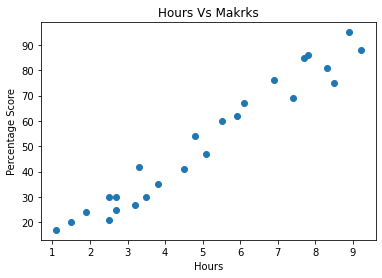

In [27]:
plt.scatter(df['Hours'], df['Scores'])
plt.title("Hours Vs Makrks")
plt.xlabel("Hours")
plt.ylabel("Percentage Score")
plt.show()

### Above graph, clearly shows the positive relation between the number of Hours and percentage score.

# Spliting the Dataset Into X & y

In [28]:
x = df.iloc[:,:-1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [29]:
y = df.iloc[:,-1].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Train  & Test split

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [32]:
line = model.coef_ * x + model.intercept_

### Regression plot

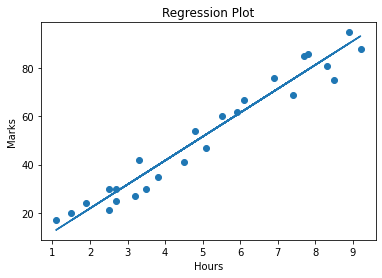

In [33]:
plt.plot(x, line)
plt.scatter(df['Hours'], df['Scores'])
plt.title("Regression Plot")
plt.xlabel("Hours")
plt.ylabel("Marks")
plt.show()

# Predicated Output

In [34]:
pred = model.predict(x_test)
pred

array([16.84472176, 33.74557494, 75.50062397, 26.7864001 , 60.58810646,
       39.71058194, 20.8213931 ])

In [35]:
data = pd.DataFrame({'Actual': y_test, 'Predicted': pred})

In [36]:
data.head()

,Actual,Predicted
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106


## prediction of score if student studies for 9.25 Hours a day

In [37]:
hours =[[9.25]]
pred_val = model.predict(hours)
print('Number of total hours : {}'.format(hours))
print('Predicted Score : {}'.format(pred_val[0]))

Number of total hours : [[9.25]]
Predicted Score : 93.89272889341655


# Evaluation Of Model

In [38]:
from sklearn.metrics import mean_absolute_error, accuracy_score
print("Mean Aboslute Error: ", mean_absolute_error(y_test, pred))

Mean Aboslute Error:  4.130879918502486
